# Interview Prep: Data Structures and Algorithms

In [82]:
import math
import random
import time
from tqdm.notebook import tqdm
import heapq
from collections import Counter, deque
from bisect import bisect_left
import matplotlib.pyplot as plt
from copy import deepcopy

random.seed(123)

## Binary Search

- Naively searching an array for a value in a for loop runs in $O(n)$ time. This is linear search.
- The python `value in array` version of search runs in linear time.
- Binary search can find the value in a *sorted* array in $O(\log n)$ time.
- Can use the standard library `bisect.bisect_left` function to do vanilla binary search in python.
- Many problems can be reduced to a form of binary search.
    - Suppose you have a sorted array and a target, and that you can map a problem to a mask condition mask(array, target). Then the problem of finding the *boundary* of the mask is equivalent to binary search.
    - For these problems, it may be easier filling in the mask template first, and then filling in what the mask is.

In [2]:
def linear_search(array, value):
    for i in range(len(array)):
        if value == array[i]:
            return i
    return -1

def binary_search(array, value):
    """return idx of value in array, else -1"""
    first, last = 0, len(array) - 1
    idx = -1
    while first <= last:
        mid = (first + last) // 2
        if value <= array[mid]:
            idx = mid
            last = mid - 1
        if value > array[mid]:
            first = mid + 1
    return idx

def binary_search_mask(mask):
    """returns idx of mask boundary, else -1
    example: mask=[False, False, True, True] -> idx=2
    this template can be used to solve many problems given a mask"""
    first = 0
    last = len(mask) - 1
    idx = -1
    while first <= last:
        mid = (first + last) // 2
        if mask[mid]:
            idx = mid
            last = mid - 1
        else:
            first = mid + 1
    return idx

In [3]:
array = list(range(5, 100_000))
value = 50_000

In [4]:
%timeit linear_search(array, value)

1.34 ms ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
%timeit binary_search(array, value)

1.71 µs ± 13.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
%timeit (value in array)

277 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%timeit bisect_left(array, value)

221 ns ± 1.27 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Sorting

- Naive sorting algorithms generally run in worst case $O(n^2)$ time.
- The best proven possible worst case running time for arrays of *arbitrary objects* is $O(n\log n)$.
- A sorting algorithm is **in-place** if the sort is done inside the same array, without copying to a new array.
- A sorting algorithm is **stable** if it preserves the order of objects of the same sorting rank.
- In Python:
    - In-place sorting can be done with `array.sort`.
    - To copy a sort to a *new* array, use `sorted(array)`. This will be slower than in-place.
- Python's default sorting uses a variation of quick sort for mostly unsorted arrays, and insertion sort for mostly sorted arrays.
- Probably the 3 most important sorting algorithms to know about are:
    - **Merge sort:** Uses a divide and conquer strategy to sort. Worst case is $O(n\log n)$ time. Memory inefficient.
    - **Quick sort:** Uses a random pivot to split and sort recursively. Worst case is $O(n^2)$ time, but the *average* case is $O(n\log n)$ time. More memory efficient and practical, unless array is almost sorted.
    - **Insertion sort:** Moving from left to right in array, iteratively takes the next value and inserts it to its sorted spot in the left, sorted piece. Worst case is $O(n^2)$ time, but is $O(1)$ time for almost sorted arrays.

In [90]:
def merge_sort(array):
    def merge(left, right):
        i = j = 0
        array = []
        while i + j < len(left) + len(right):
            if j == len(right) or (i < len(left) and left[i] < right[j]):
                array.append(left[i])
                i += 1
            else:
                array.append(right[j])
                j += 1
        return array
    
    # base case: don't sort if not needed
    if len(array) <= 1:
        return array
    # recursion: split array in half recursively
    mid = len(array) // 2
    left = merge_sort(array[:mid])
    right = merge_sort(array[mid:])
    # merge sorted results back together
    merged = merge(left, right)
    return merged

def quick_sort(array):
    # base case: don't sort if not needed
    if len(array) <= 1:
        return array
    # recursion: split into subarrays based on random pivot and recurse
    pivot = random.choice(array)
    left, equal, right = [], [], []
    for value in array:
        if value < pivot:
            left.append(value)
        elif value == pivot:
            equal.append(value)
        elif value > pivot:
            right.append(value)
    left = quick_sort(left)
    right = quick_sort(right)
    # merge sorted results back together
    merged = left + equal + right
    return merged

def insertion_sort(array):
    # iterate through array left to right
    for i in range(len(array)):
        j = i
        # bubble array[i] down to its sorted place in array[:i+1]
        while j > 0 and array[j] < array[j-1]:
            # swap current and previous elements if out of order
            array[j], array[j-1] = array[j-1], array[j]
            j -= 1
    return array

In [100]:
array = list(range(10_000))
random.shuffle(array)

In [101]:
%timeit sorted(array)

775 µs ± 2.56 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [102]:
random.shuffle(array)

In [103]:
%timeit array.sort()

24.9 µs ± 23.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [104]:
random.shuffle(array)

In [105]:
%timeit merge_sort(array)

66.7 ms ± 531 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [106]:
random.shuffle(array)

In [107]:
%timeit quick_sort(array)

51.9 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [108]:
random.shuffle(array)

In [109]:
%timeit insertion_sort(array)

3.1 s ± 16.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Recursion

- The process of a function calling itself until terminating according to some base case.
- The programming analogue of proof by induction. You need *both* a base case and a recursive relation.
- In memory, recursion is stored using a **stack frame**. Each element in the stack is a particular recursive call.
- Failing to have a proper base case the recursion is guaranteed to hit will result in a **stack overflow**, where the program runs out of memory.
- Can often visualize recursion with a tree.
    - Example: 
    ```
    factorial(5) - factorial(4) - factorial(3) - factorial(2) - factorial(1)
    ```
    - Example:
    ```
    fibonacci(3) - fibonacci(2) - fibonacci(1)
                   |              - fibonacci(0)
                   - fibonacci(1)
    ```
- Not always a good idea to use *in practice* in Python because of the lack of tail-call optimization, but it *is* useful for having a simpler implementation of some types of interview questions.
- Any recursive algorithm can be unrolled into an iterative algorithm, and vice versa.

In [4]:
def factorial(n):
    # O(n) time without memoization
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)
    
def fibonacci(n):
    # O(n!) time without memoization
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)

In [5]:
fibonacci(10)

55

## Trees

- A **tree** is a data structure of **nodes** connected by **edges**, where there is exactly one incoming edge from a **parent node**, and one or more outgoing edges to **child nodes**. The node with no parent is called the **root**. Nodes with no children are called the **leaves**. The number of levels in the tree is called its **depth**. Any nodes above a given node is called its **ancestors**, and any nodes below it are its **descendents**.
<img src=https://algomonster.s3.us-east-2.amazonaws.com/tree_intro/tree_intro.001.png width=500>
- The nodes generally are values of some kind, and the edges are pointers connecting those values.
- A tree cannot have cycles or loops, and must have one unique root.
- A **binary tree** is a tree in which each node has no more than 2 children. An **n-ary tree** is a tree in which each node has no more than $n$ children.
- A binary tree is **balanced** if the height difference of the left and right subtree of any given node in the tree is never more than one.
- A **binary search tree** or **BST** is a binary tree satisfying the property that for any node, any left descendants are always less in value than any right descendants.
- Searching, insertion, and deletion in a *balanced* BST take $O(\log n)$ time, and $O(n)$ time if the BST is *unbalanced*.

In [111]:
class BinaryTreeNode:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
        
    def __repr__(self):
        return f'BinaryTreeNode({self.value}, left={self.left}, right={self.right})'
    
    def print_tree(self, level=0):
        indent = '   '
        if self is not None:
            current_level = level
            if self.left is not None:
                self.left.print_tree(current_level + 1)
            print(f'{indent * current_level} {self.value}')
            if self.right is not None:
                self.right.print_tree(current_level + 1)
        
class NaryTreeNode:
    def __init__(self, value, children=[]):
        self.value = value
        self.children = children
        
    def __repr__(self):
        return f'NaryTreeNode({self.value}, children={[node for node in self.children]})'
    
    def print_tree(self, level=0):
        indent = '   '
        if self is not None:
            current_level = level
            print(f'{indent * current_level} {self.value}')
            for child in self.children:
                child.print_tree(current_level + 1)

In [112]:
root = BinaryTreeNode(1, left=BinaryTreeNode(2, left=BinaryTreeNode(4)), right=BinaryTreeNode(3))
root

BinaryTreeNode(1, left=BinaryTreeNode(2, left=BinaryTreeNode(4, left=None, right=None), right=None), right=BinaryTreeNode(3, left=None, right=None))

In [113]:
root.print_tree()

       4
    2
 1
    3


In [114]:
root = NaryTreeNode(1, children=[NaryTreeNode(2, children=[NaryTreeNode(4)]), NaryTreeNode(3)])
root

NaryTreeNode(1, children=[NaryTreeNode(2, children=[NaryTreeNode(4, children=[])]), NaryTreeNode(3, children=[])])

In [115]:
root.print_tree()

 1
    2
       4
    3


### Tree Traversals

- There are 3 common ways to traverse the nodes in a binary tree: pre-order, in-order, and post-order traversal.
- **Pre-order traversal** visits the current node first, then the left subtree, and finally the right subtree.
- **In-order traversal** visits the left branch first, then the current node, and finally the right branch.
- **Post-order traversal** visits the left subtree first, then the right subtree, and finally the current node.
- Traversals can be used to search trees, as well as build them from a list of nodes.
- Since every subtree of a given node gets traversed, all traversals run in $O(n)$ time.

In [116]:
def tree_traversal(node, order='in-order'):
    """return a list of the values in a tree in traversed order"""
    def in_order_traversal(node):
        if node is not None:
            in_order_traversal(node.left)
            values.append(node.value)
            in_order_traversal(node.right)
    def pre_order_traversal(node):
        if node is not None:
            values.append(node.value)
            pre_order_traversal(node.left)
            pre_order_traversal(node.right)
    def post_order_traversal(node):
        if node is not None:
            post_order_traversal(node.left)
            post_order_traversal(node.right)
            values.append(node.value)   
    values = []
    if order == 'in-order':
        in_order_traversal(node)
    elif order == 'pre-order':
        pre_order_traversal(node)
    elif order == 'post-order':
        post_order_traversal(node)
    return values

In [117]:
root = BinaryTreeNode(1, 
    left=BinaryTreeNode(2, left=BinaryTreeNode(4), right=BinaryTreeNode(5)), 
    right=BinaryTreeNode(3, left=BinaryTreeNode(6), right=BinaryTreeNode(7))
)

In [118]:
tree_traversal(root, order='in-order')

[4, 2, 5, 1, 6, 3, 7]

In [119]:
tree_traversal(root, order='pre-order')

[1, 2, 4, 5, 3, 6, 7]

In [120]:
tree_traversal(root, order='post-order')

[4, 5, 2, 6, 7, 3, 1]

### Depth First Search

- **Depth first search** or **DFS** uses a *pre-order traversal* to search the tree in a depth first fashion from left to right.
- It's usually easiest to code DFS up using left to right recursion on the subtrees of the root. This is a *divide and conquer* approach, since it recursively divides a node into its subtrees until it hits the leaves or finds the target.
- DFS is one of the most important algorithms to know by heart for coding interviews since it comes up a lot, often disguised as **backtracking**, which is basically the same thing. Tree search comes up in these types of problems:
    - Any tree traversal problem (finding a node, detect balanced BST, max subtree).
    - Combinatorial problems (how many ways to, find all possible combinations, find all solutions to).
    - Searching graphs with no cycles (path between 2 nodes, cycle detection, find connected components).
- Keys to tree problems: 
    - Think from the perspective of a node. All you can do is look at your value and your children. Figure out how to recurse on that information.
    - What do we want to return after visiting a node? Use the return value to pass information from children to parent.
    - What states (i.e. function arguments) do we need to maintain to compute the return value for the current node. Use states to pass information from parent to children.
    - There are two ways to keep track of global information in a tree: return values, and global variables. Return values are usually easier for simpler problems, and global variables for more complex problems.

In [121]:
def dfs(root, target):
    if root is None:
        return None
    if root.value == target:
        return root
    return dfs(root.left, target) or dfs(root.right, target)

In [150]:
root = BinaryTreeNode(1, 
    left=BinaryTreeNode(2, left=BinaryTreeNode(4), right=BinaryTreeNode(5)), 
    right=BinaryTreeNode(3, left=BinaryTreeNode(6), right=BinaryTreeNode(7))
)

In [151]:
root.print_tree()

       4
    2
       5
 1
       6
    3
       7


In [124]:
dfs(root, 7)

BinaryTreeNode(7, left=None, right=None)

### Binary Search Trees (BSTs)

- A **BST** is a binary tree with the value of each internal node being greater than all the values in the respective node's left subtree and less than the ones in its right subtree.
- Some kind of ordering is assumed on the nodes, be it numerical or dictionary or whatever else.
- An in-order traversal of a BST will always return values in sorted order.
- An empty binary tree is trivially a BST.
- Given a BST with $n$ nodes and height $h$, search can be performed in $O(h)$ time. If the tree is balanced, $h=O(\log n)$. If not, $h=O(n)$.
- One advantage of a BST compared to a sorted list is that inserting an item into the BST doesn't require each item in the list to move down an index, like inserting to a sorted list would do. 
- Insertion, deletion, and search in a BST is $O(h)$, usually $O(\log n)$.
- If insertions and deletions to a BST are frequent, a balanced BST can become unbalanced over time, resulting in degraded performance. In such cases it's helpful to **rebalance** the BST so that it again has $h=O(\log n)$.
- Examples of **self-balancing** BSTs are **AVL trees** and **R/B Trees**. These trees keep themselves balanced dynamically with every insert/delete operation.
- Since most languages dynamically resize arrays now, insertions and deletions are *amortized* $O(1)$ time, making BSTs less practically useful relative to lists or dictionaries.
- When to use a BST vs a sorted list:
    - You're doing a lot of insertions or deletions. These are $O(\log n)$ for a balanced BST but $O(n)$ for a sorted array (unless the arrays are dynamically resized).
    - Maintaining sorted order while doing insertions or deletions is very important. Dictionaries aren't generally in sorted order.
    - Finding the first value in a sorted list *greater* than some given value is easier using a BST.
    - Finding the $k$th largest or smallest values in a list is easier with a BST.
    - Memory usage is lower for BSTs than dictionaries. So if memory usage is very important, BSTs could be more useful.

In [ ]:
def valid_bst(root):
    """Check if a binary tree is in proper in-order sorted order"""
    nodes = []
    def recurse(node):
        if node is not None:
            left = recurse(node.left)
            nodes.append(node)
            right = recurse(node.right)
    recurse(root)
    for i in range(1, len(nodes)):
        if not nodes[i-1].value <= nodes[i].value:
            return False
    return True

def bst_search(node, value):
    """Given a valid BST, return True if value is in BST, else False"""
    if node is None:
        return False
    elif node.value == value:
        return True
    elif value < node.value:
        return bst_search(node.left, value)
    else:
        return bst_search(node.right, value)
    
def bst_insert(node, value):
    """Given a valid BST, insert value in sorted place and return new BST"""
    if node is None:
        return BinaryTreeNode(value)
    elif value <= node.value:
        node.left = bst_insert(node.left, value)
    elif value > node.value:
        node.right = bst_insert(node.right, value)
    return node

## Backtracking
### Combinatorial Search

- Combinatorial search problems involve finding groupings and assignments of objects that satisfy certain conditions.
- Examples include finding all permutations, finding all subsets, solving sudoku, and the 8 queens problem.
- The **permutations** of a list are the different possible orderings of that list.
    - Example: `abc` has permutations `abc`, `acb`, `bca`, `bac`, `cab`, `cba`. That's $3!=6$ total.
    - For a list with $n$ elements, there are $n!$ permutations of that list.
    - Permutations can be thought of as a tree. For example, the above example has the following tree:
    <img src=https://algomonster.s3.us-east-2.amazonaws.com/dfs_intro/arrangement.png width=500>
- Combinatorial problems very often are $O(2^n)$ or $O(n!)$ time, making them very slow to brute force. This is called combinatorial explosion.
- The search space of combinatorial problems can be represented with a **state-space tree**. Each node in the tree represents a possible reachable state in the search problem. The leaf nodes are the solutions to the problem.
- Combinatorial search problems boil down to DFS/backtracking on the state-space tree.
- These trees can get very large, so pruning often has to be done.
- To solve combinatorial search problems:
    1. Identify the states.
        - What do we need to keep track of to find the solution?
        - How do we decide which child nodes should be visited next?
        - How do we decide which nodes to prune?
    2. Draw the state-space tree.
        - Physically draw out the state space on paper. Don't skip this step!
        - Test on a small example, all the way down to the leaf nodes.
    3. DFS/backtrack on the state-space tree.
        - Apply the following backtracking template to traverse the tree with DFS and solve.
- Backtracking template:
```python
def search(node, state):
    if state is a solution:
        report(state) # e.g. add state to final result list
        return
    for child in children:
        if child is a part of a potential solution: # pruning the tree
            state.append(child) # make move
            search(child, state)
            state.remove(child) # backtrack
```
- Tip: When coding the search problem, first pretend you're working with a tree node object. Once you have code that looks good that way, change it to work with whatever the problem calls for instead.

In [50]:
def find_permutations(letters):
    # factorial time recursion algorithm...only works up to like 10 letters
    permutations = []
    def recurse(remaining=[], path=[]):
        if len(path) == len(letters):
            permutations.append(''.join(path))
        else:
            for idx in range(len(remaining)):
                recurse(remaining=remaining[:idx]+remaining[idx+1:], path=path+[remaining[idx]])
    recurse(remaining=list(letters))
    return permutations

find_permutations('abc')

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

  0%|          | 0/10 [00:00<?, ?it/s]

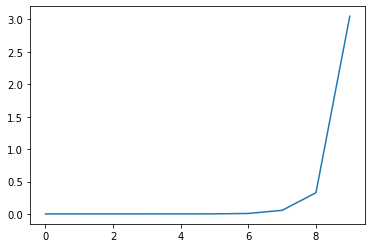

In [56]:
letters = ''
times = []
for i in tqdm(range(10)):
    letters += str(i)
    result = %timeit -n1 -r1 -o -q find_permutations(letters)
    times.append(result.average)
plt.plot(times)